#### This project aims to develop and evaluate machine learning models for predicting house prices. 
#### The project will explore various algorithms including linear regression, random forest regression, decision trees and potentially 
#### others.  

#### Let's import important libs or packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set option to display max columns i.e (Display all the columns of the dataframe).
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Import data
data_train=pd.read_csv('House Pricing Dataset/train.csv')
data_test=pd.read_csv('House Pricing Dataset/test.csv')
dataset = [data_train,data_test]
df = pd.concat(dataset).reset_index(drop=True)
df.head()
df.shape

(2919, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Data Pre processing
#### Data preprocessing is a crucial step in any machine learning project. It involves cleaning, transforming, and manipulating the raw data 
#### to prepare it for analysis and modeling. Raw data is often messy, incomplete, and inconsistent, making it unsuitable for training 
#### machine learning models. Preprocessing helps ensure the data is high-quality and ready for the algorithms to learn effectively.
#### Goals of Data Preprocessing:
#### 1. Improve Data Quality: Remove errors, inconsistencies, and missing values from the data.
#### 2. Enhance Consistency: Ensure all data points are formatted uniformly and adhere to a specific structure.
#### 3. Handle Missing Values: Decide how to address missing data points (e.g., imputation techniques, deletion).
#### 4. Transform Features: Scale or normalize features to a common range for better model performance.
#### 5. Feature Engineering (Optional): Create new features from existing ones to improve model understanding.

In [6]:
pd.pandas.set_option('display.max_rows',None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Let's first deal with categorical nan values.
categorical_feature_nan = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtype == 'O']
for i in categorical_feature_nan:
    print(i, df[i].isnull().sum())

MSZoning 4
Alley 2721
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 1766
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
Electrical 1
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2348
MiscFeature 2814
SaleType 1


In [8]:
# NA have some meanings according to data description.
df[categorical_feature_nan] = df[categorical_feature_nan].fillna('NA')
df.head()
df[categorical_feature_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [9]:
# Now, deal with numerical missing values
numerical_feature_nan = [i for i in df.columns if df[i].isnull().sum()>0 
                         and df[i].dtype != 'O'
                         and i not in ['SalePrice'] ]
for i in numerical_feature_nan:
    print(i, df[i].isnull().sum())

LotFrontage 486
MasVnrArea 23
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1


In [10]:
# Now, fill missing values with median coz data has many outliers so filling with mean or mode is not best for dataset.
for i in numerical_feature_nan:
    mod_value = df[i].mode()[0]
    df[i].fillna(mod_value, inplace=True)
df[numerical_feature_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

#### This code snippet performs a specific type of data preprocessing on a pandas DataFrame (df). It focuses on categorical features within 
#### the DataFrame and converts them into a numerical representation suitable for machine learning models.
#### Import CategoricalDtype: It starts by importing CategoricalDtype from the pandas.api.types module. This class allows defining 
#### categories and their order for categorical data.


In [11]:
from pandas.api.types import CategoricalDtype
df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'No', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes
df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes
df['Street'] = df['Street'].astype(CategoricalDtype(categories=['Grvl', 'Pave'], ordered = True)).cat.codes
df['Alley'] = df['Alley'].astype(CategoricalDtype(categories=['NA','Grvl', 'Pave'], ordered = True)).cat.codes
df['LotShape'] = df['LotShape'].astype(CategoricalDtype(categories=['IR3', 'IR2', 'IR1', 'Reg'], ordered = True)).cat.codes
df['LandContour'] = df['LandContour'].astype(CategoricalDtype(categories=['Low', 'HLS', 'Bnk', 'Lvl'], ordered = True)).cat.codes
df['LandSlope'] = df['LandSlope'].astype(CategoricalDtype(categories=['Sev', 'Mod', 'Gtl'], ordered = True)).cat.codes
df['Electrical'] = df['Electrical'].astype(CategoricalDtype(categories=['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], ordered = True)).cat.codes
df['FireplaceQu'] = df['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageType'] = df['GarageType'].astype(CategoricalDtype(categories=['NA', 'Detchd', 'CarPort', 'BuiltIn', 'Basment', 'Attchd', '2Types'], ordered = True)).cat.codes
df['PoolQC'] = df['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Fence'] = df['Fence'].astype(CategoricalDtype(categories=['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], ordered = True)).cat.codes


In [12]:
# All features which have numeric or float data type
numeric = [i for i in df.columns if df[i].dtype != 'O']
numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Create heatmap for visualize relationship of features

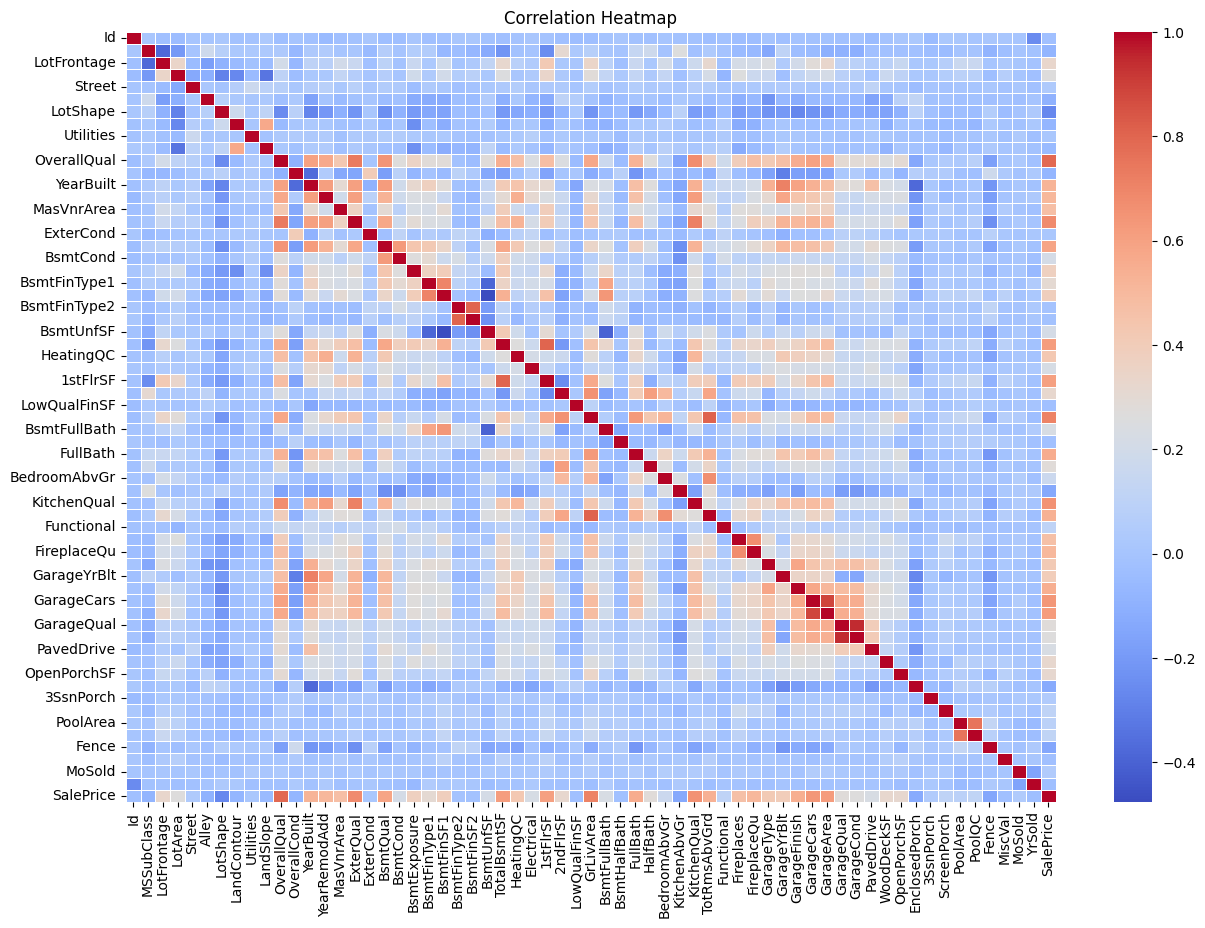

In [13]:
corr_matrix = df.select_dtypes(include=['int8', 'int64', 'float64']).corr()
# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Correlation of features regarding to target feature which is 'SalePrice'.
correlation = corr_matrix.corr()
print(correlation['SalePrice'].sort_values(ascending=False), '\n')

SalePrice        1.000000
OverallQual      0.967330
ExterQual        0.923439
KitchenQual      0.923329
GarageCars       0.904557
GarageArea       0.898778
GarageFinish     0.871441
BsmtQual         0.853201
FireplaceQu      0.849669
TotalBsmtSF      0.848395
MasVnrArea       0.847611
GrLivArea        0.847522
FullBath         0.843775
1stFlrSF         0.831886
YearRemodAdd     0.820527
YearBuilt        0.820284
HeatingQC        0.787735
Fireplaces       0.774758
GarageType       0.769759
GarageYrBlt      0.739836
OpenPorchSF      0.677098
BsmtExposure     0.675533
TotRmsAbvGrd     0.663363
WoodDeckSF       0.656064
LotFrontage      0.615247
BsmtFinSF1       0.583201
PavedDrive       0.560885
Electrical       0.520760
LotArea          0.518687
GarageQual       0.512778
HalfBath         0.507085
BsmtFinType1     0.504942
GarageCond       0.486634
BsmtUnfSF        0.431260
BsmtCond         0.421250
BsmtFullBath     0.386406
2ndFlrSF         0.318497
BedroomAbvGr     0.172297
Functional  

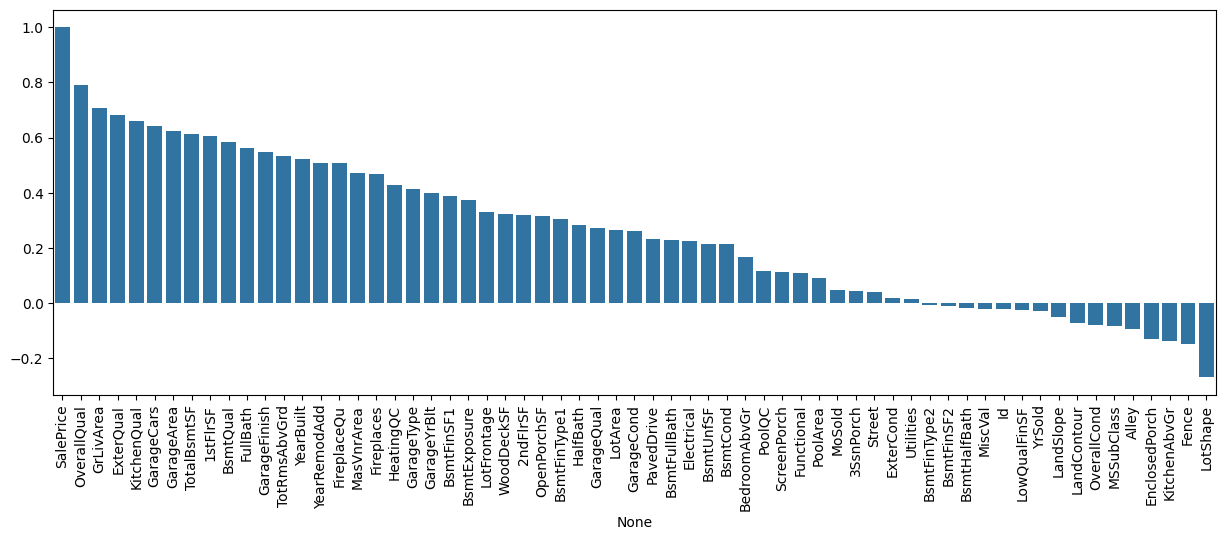

In [15]:
# Better visualization of relationship of features regarding to SalePrice.
corr_SalePrice = corr_matrix['SalePrice'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))# Create a seaborn bar chart
sns.barplot(x=corr_SalePrice.index, y=corr_SalePrice.values)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)
plt.show()

### As some models are very sensitive to outliers. This data has many outliers. So, It's best detect and remove them for 
### better output predictions

In [16]:
# Create function that can detect outliers and remove them
def detect_and_cap_outliers(df, columns, num_stds=3):
    for col in columns:
        upper_limit = df[col].mean() + num_stds * df[col].std()
        lower_limit = df[col].mean() - num_stds * df[col].std()
        df.loc[df[col] > upper_limit, col] = upper_limit
        df.loc[df[col] < lower_limit, col] = lower_limit

    return df

In [17]:
# features that have outliers
columns_to_check = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 
                    '1stFlrSF', 'MasVnrArea', 'GarageYrBlt', 
                    'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
                    'SalePrice','FullBath', 'TotRmsAbvGrd', 
                    'HeatingQC', '2ndFlrSF', 'OpenPorchSF',
                    'LotArea', 'BsmtFullBath', 'ScreenPorch']

In [18]:
df = detect_and_cap_outliers(df.copy(), columns_to_check)

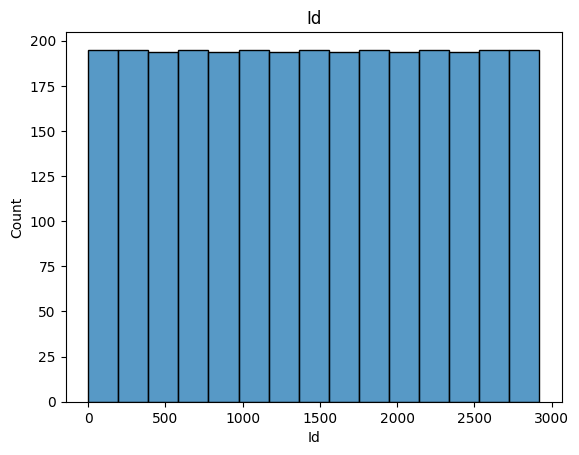

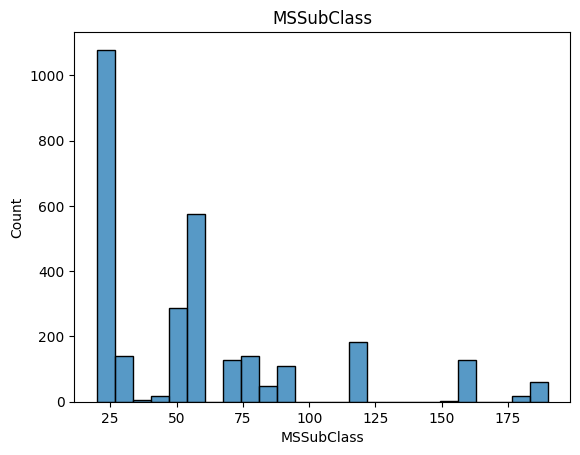

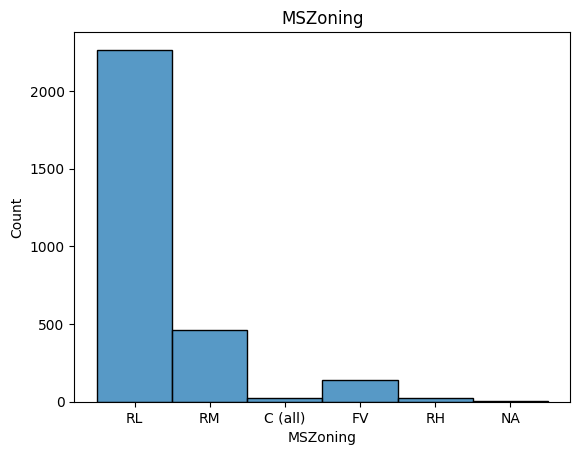

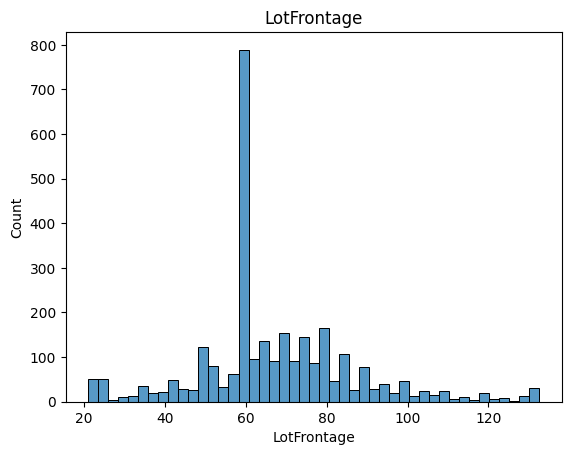

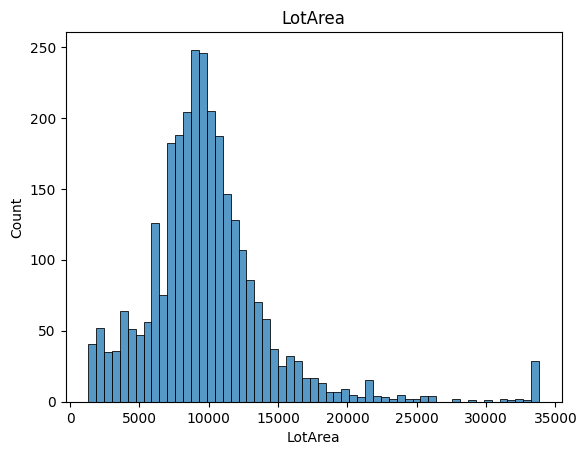

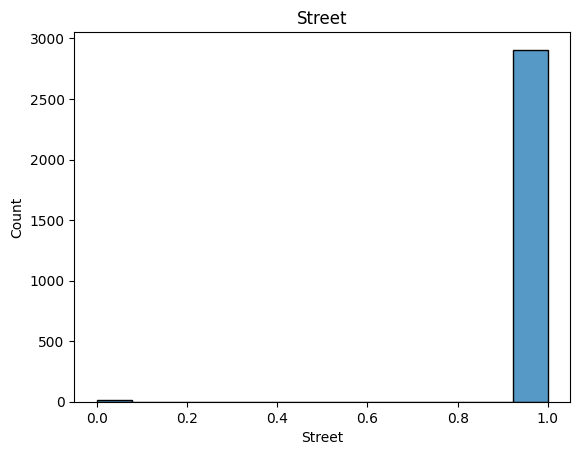

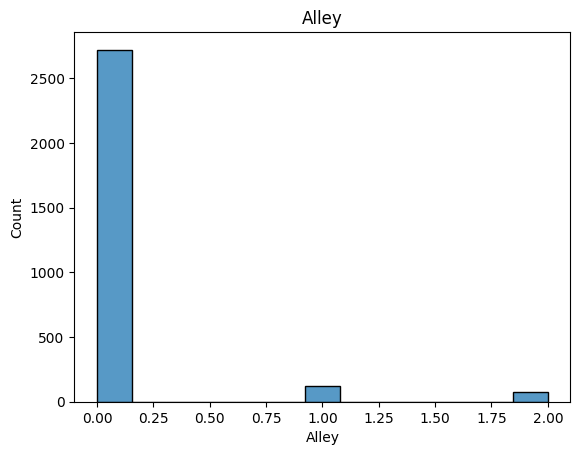

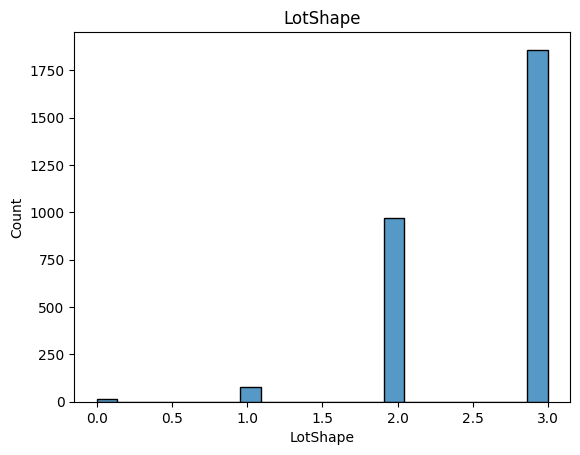

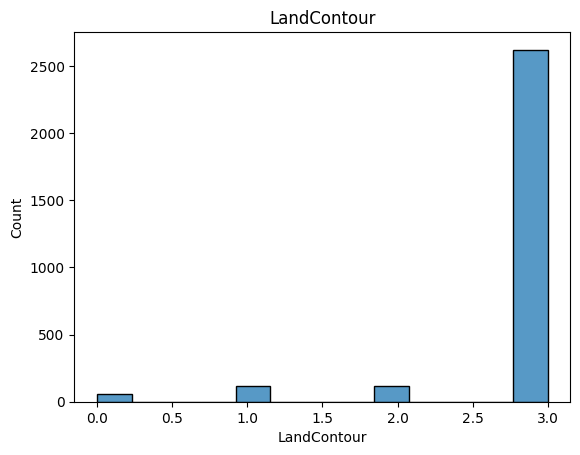

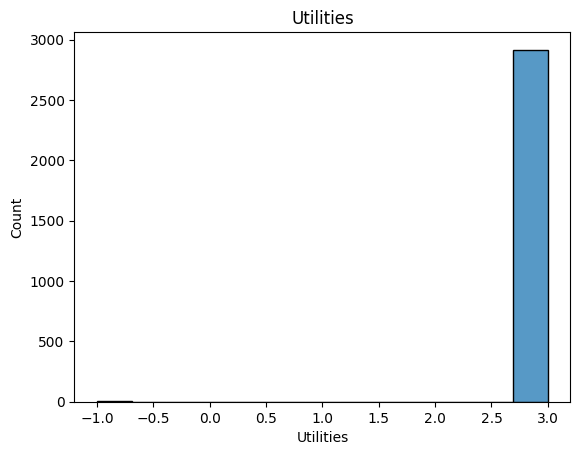

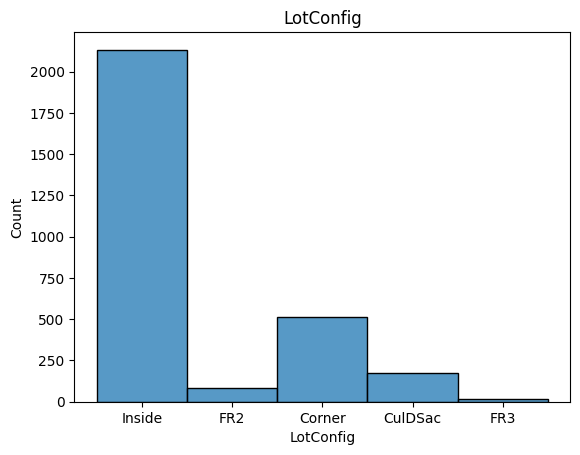

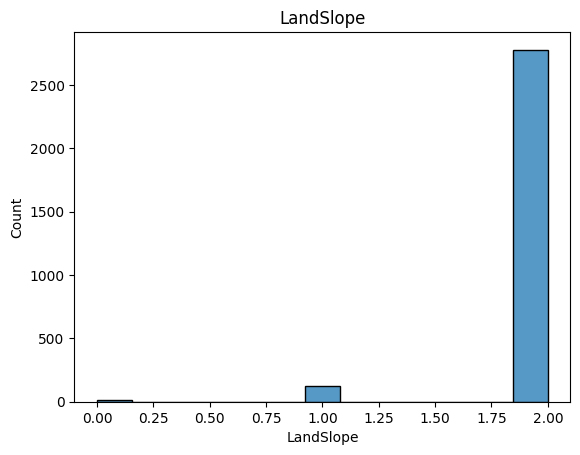

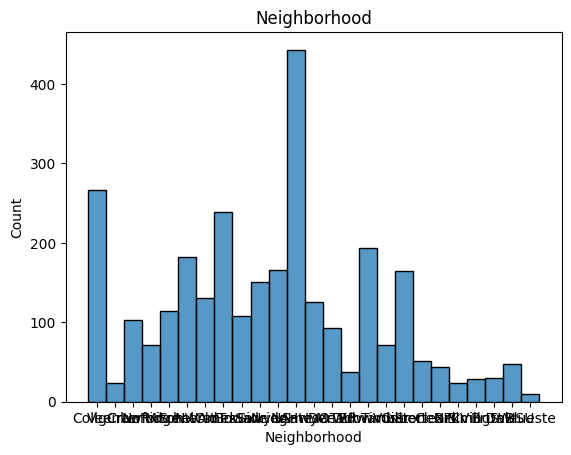

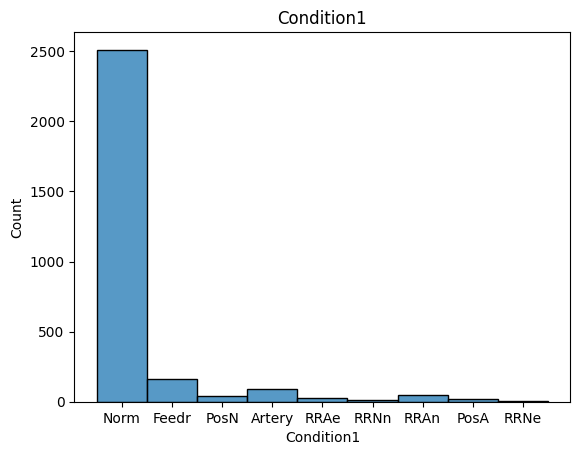

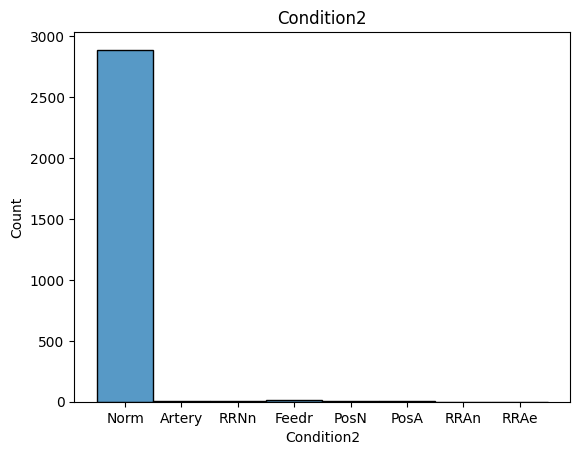

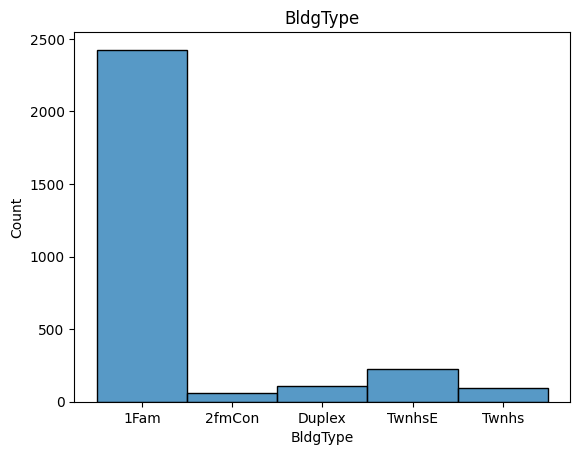

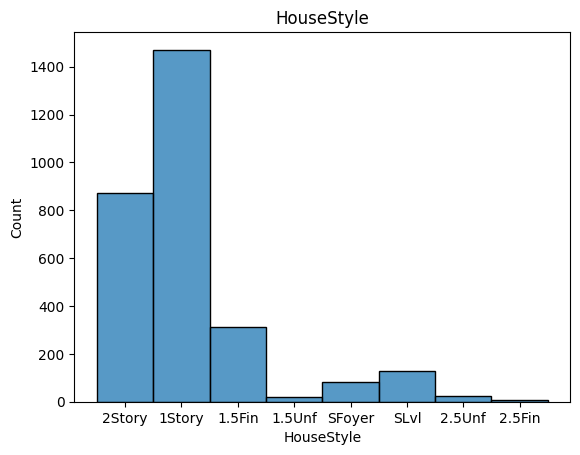

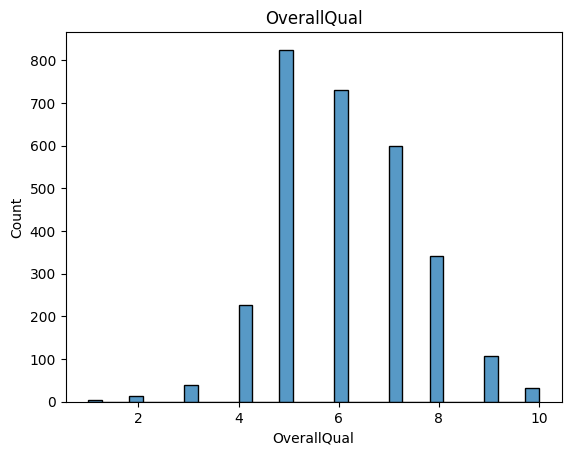

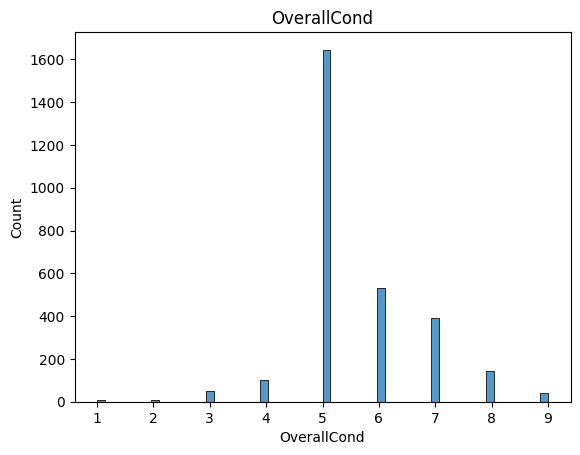

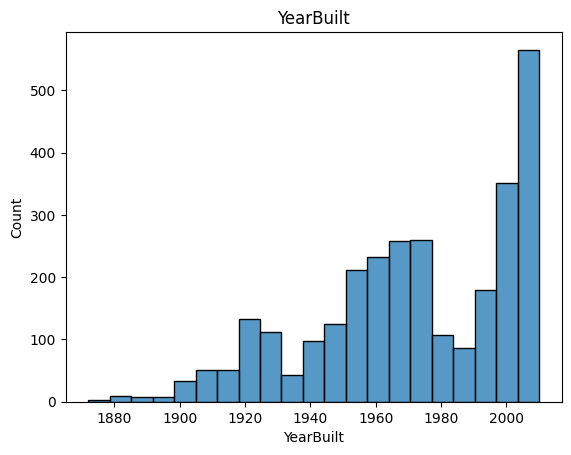

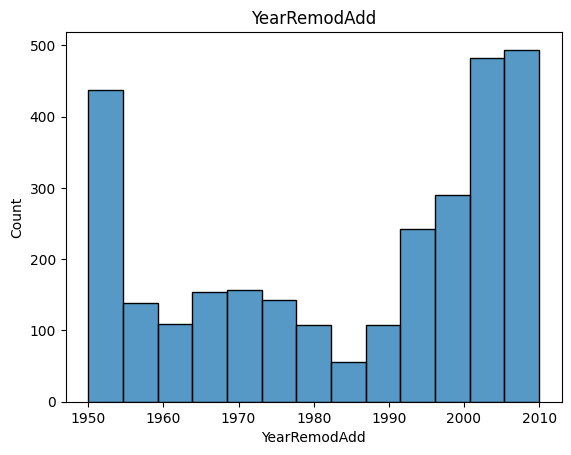

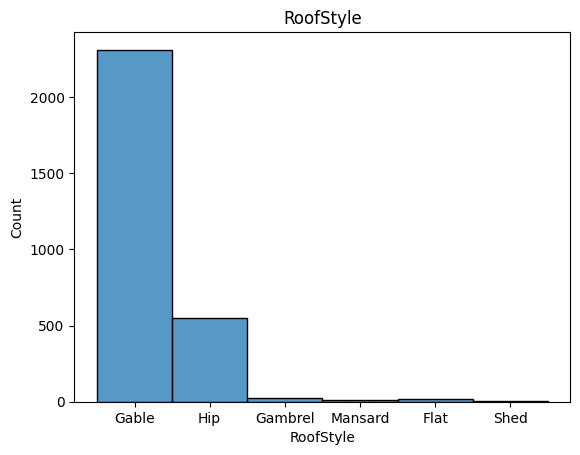

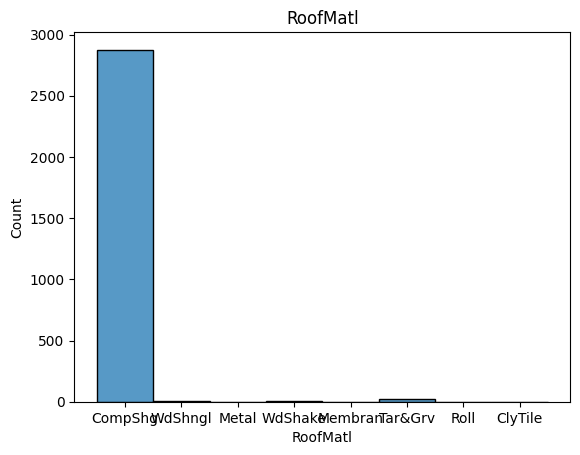

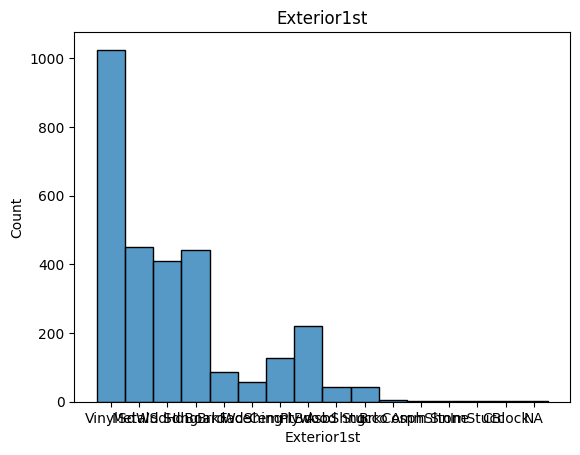

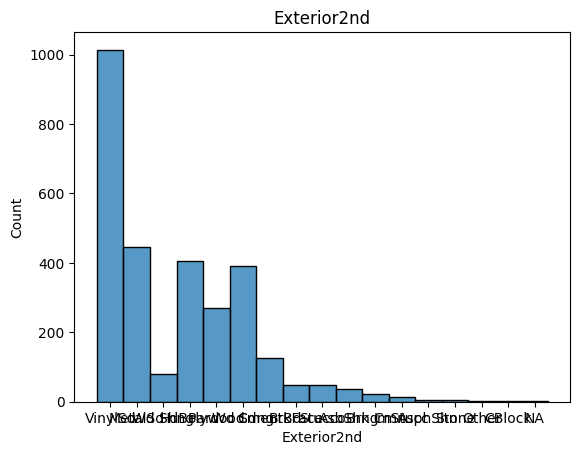

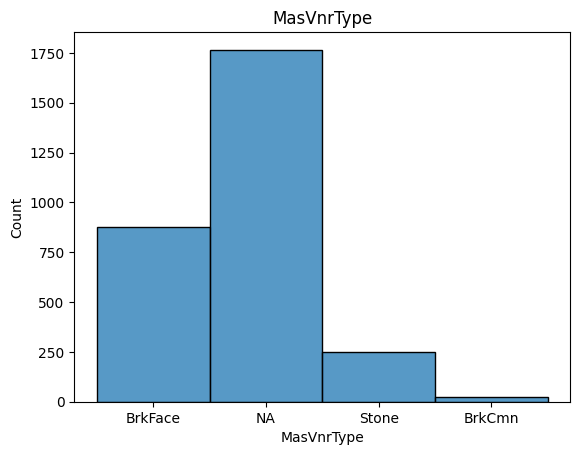

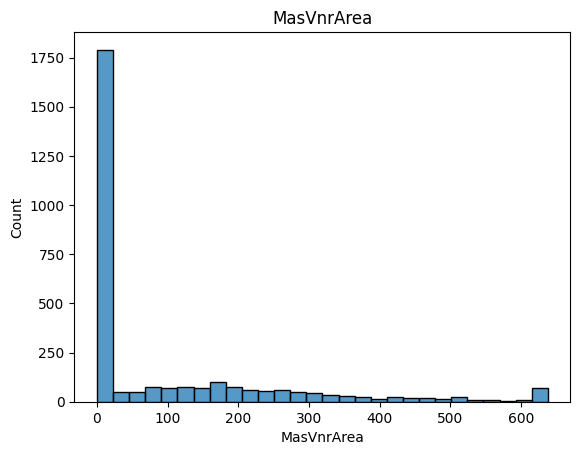

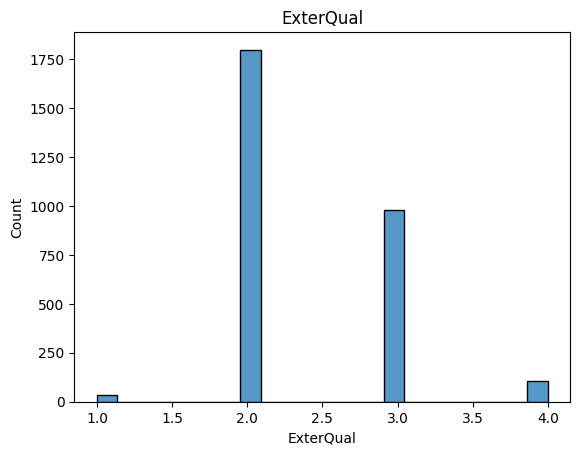

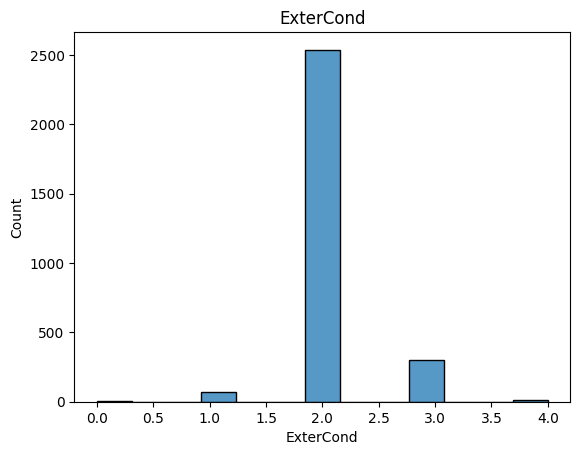

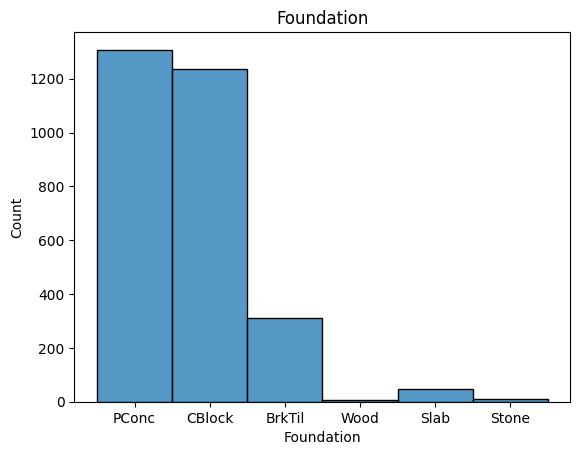

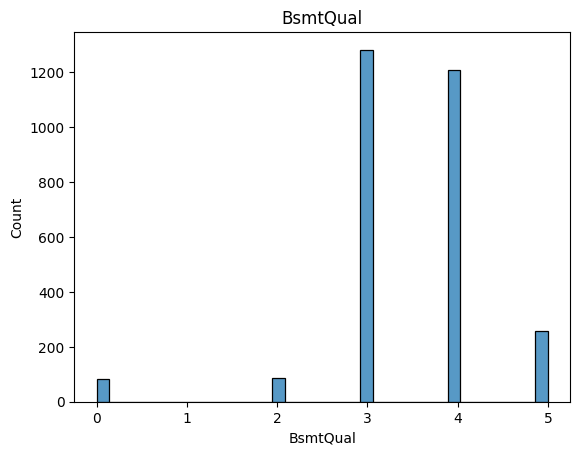

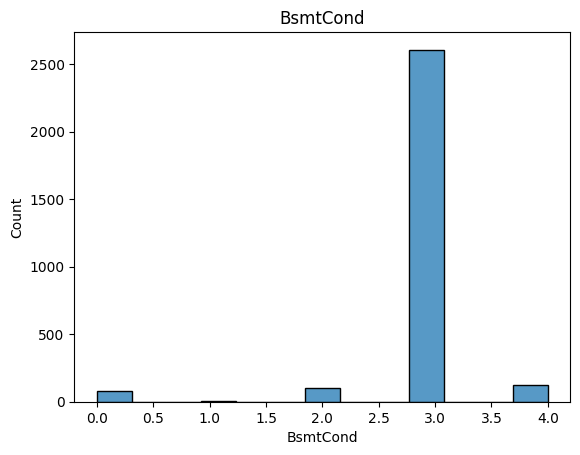

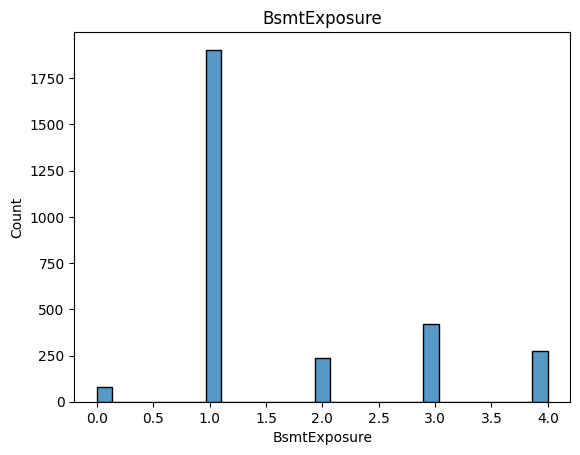

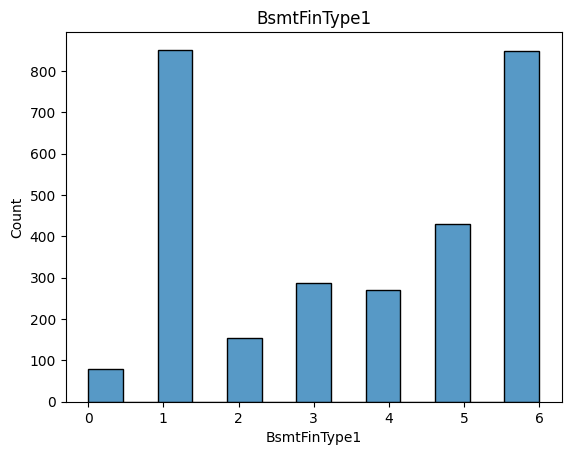

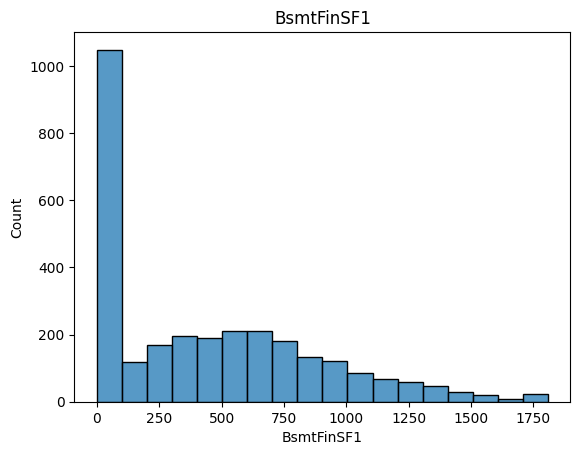

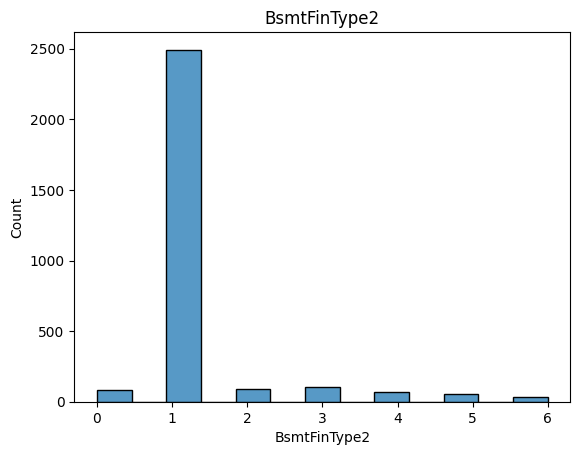

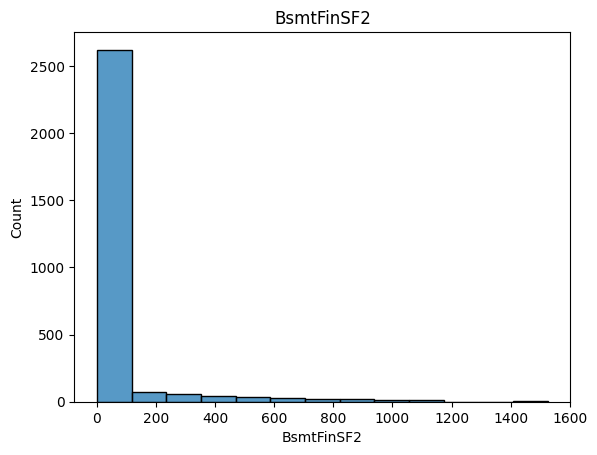

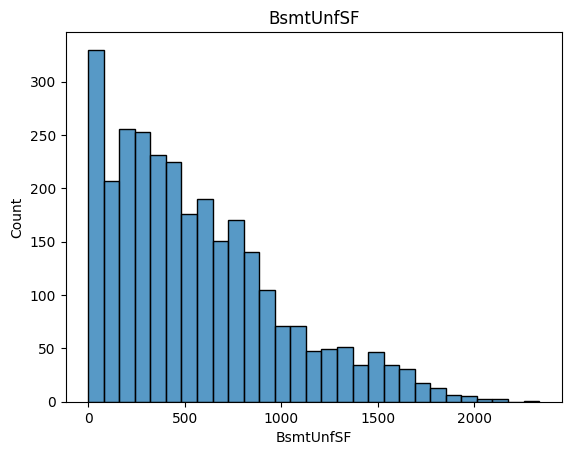

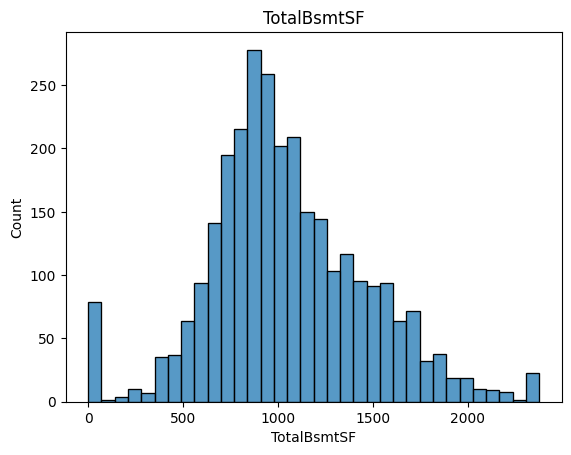

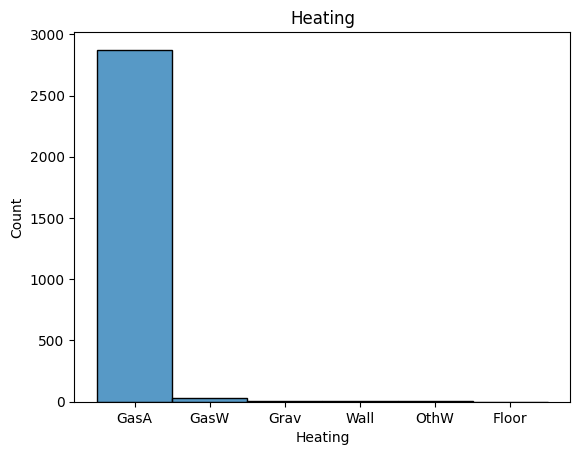

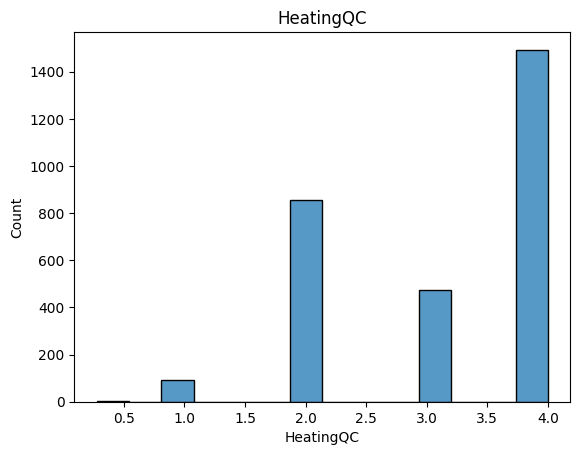

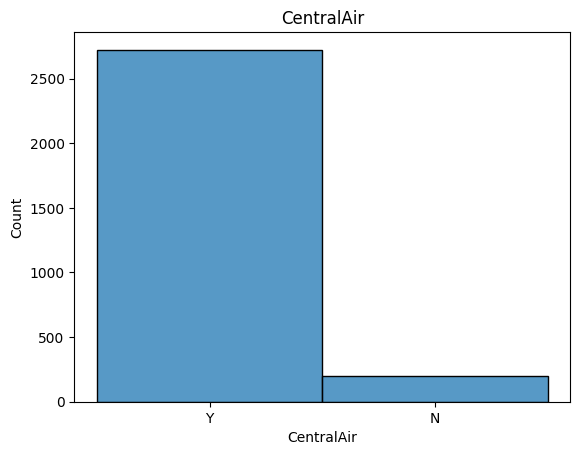

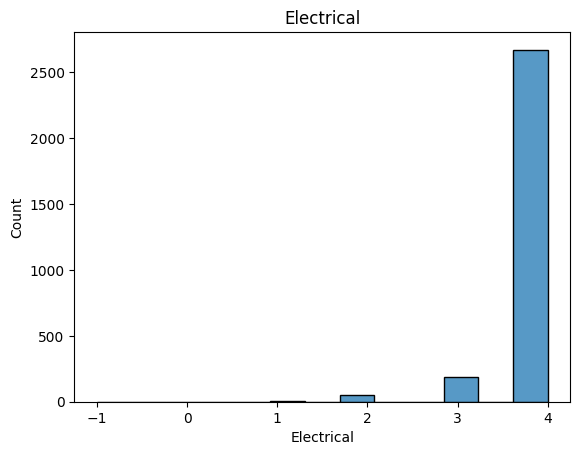

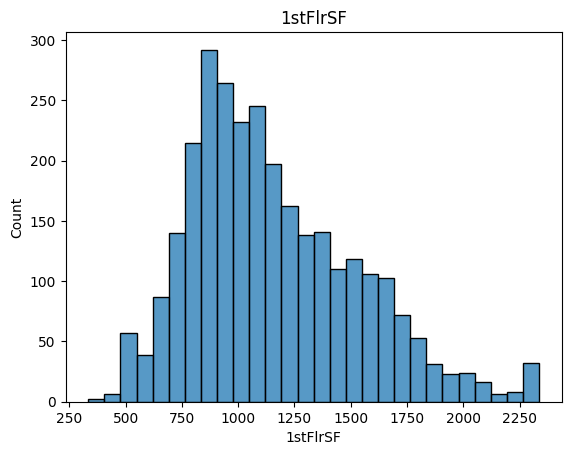

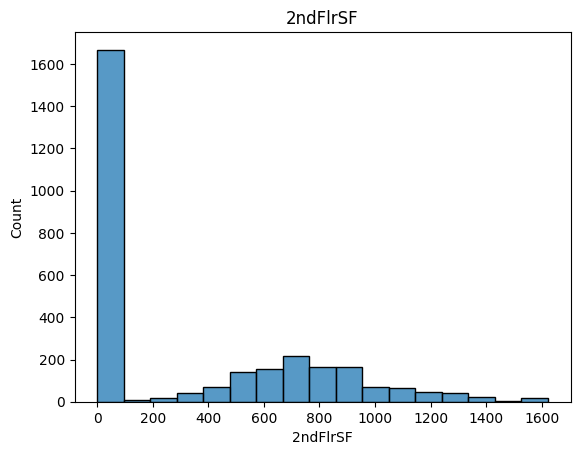

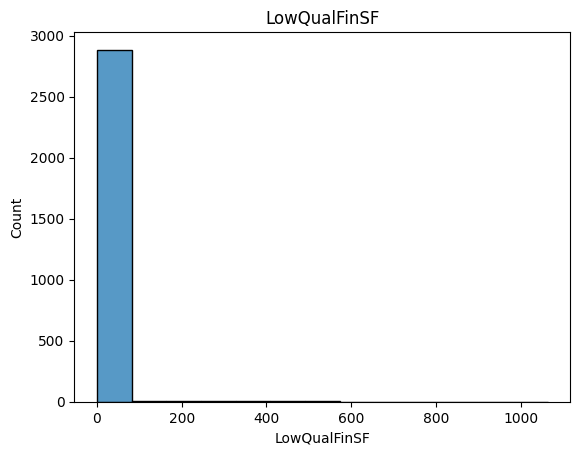

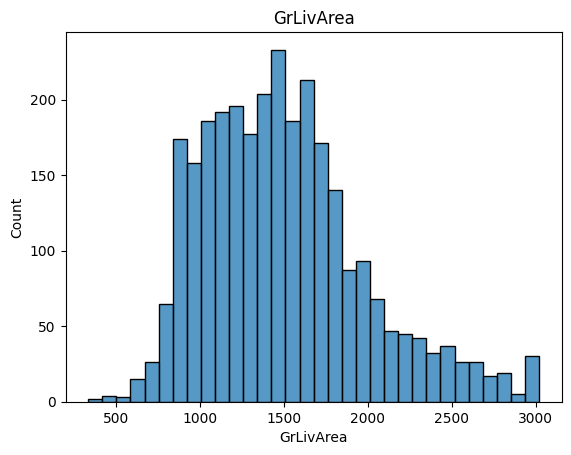

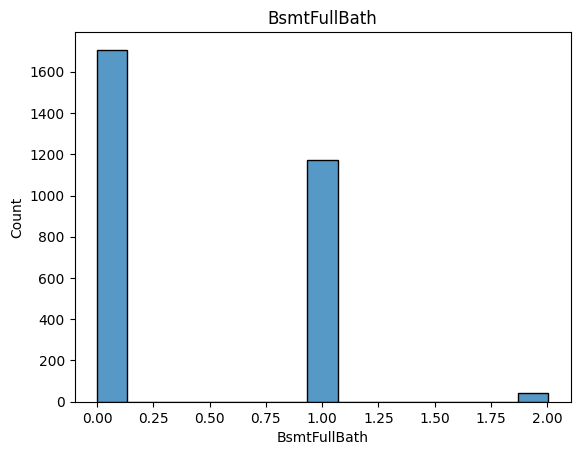

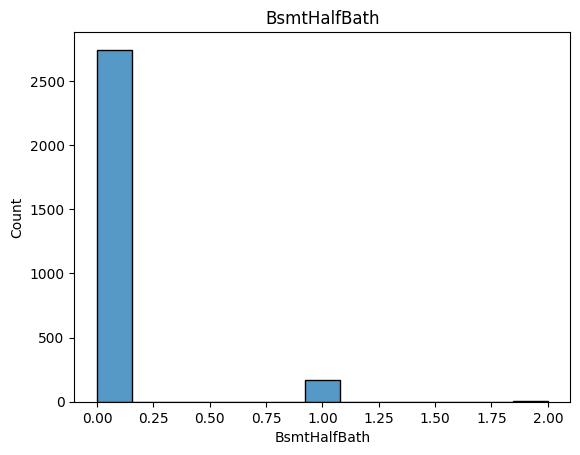

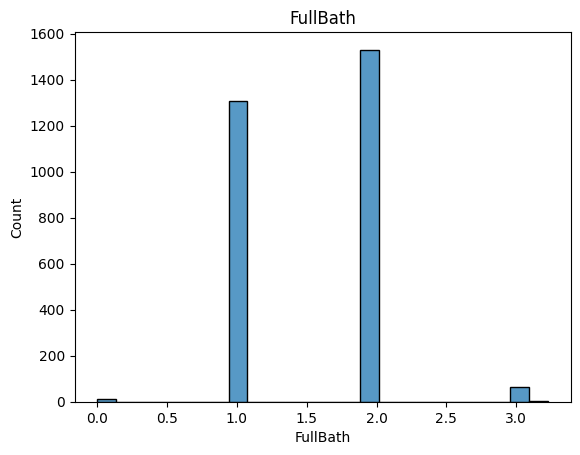

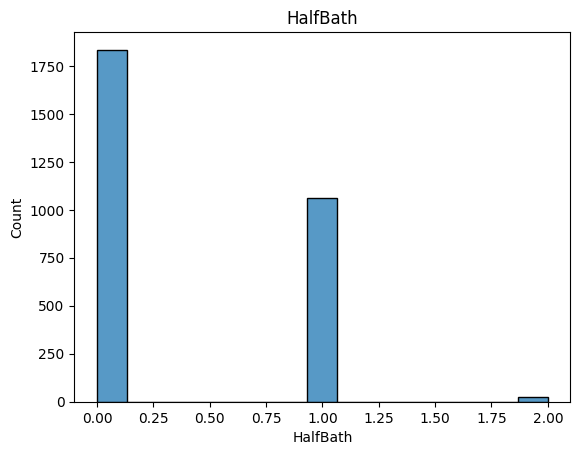

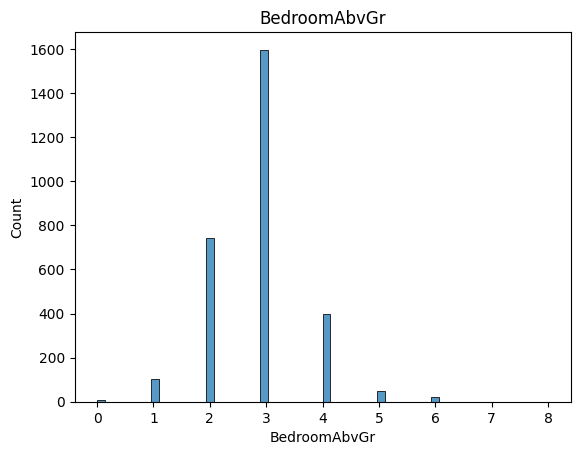

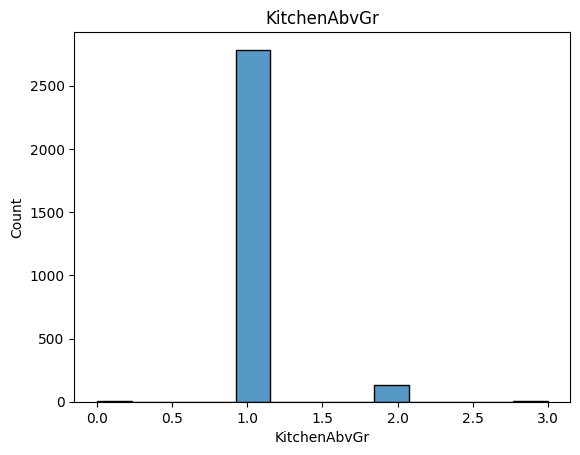

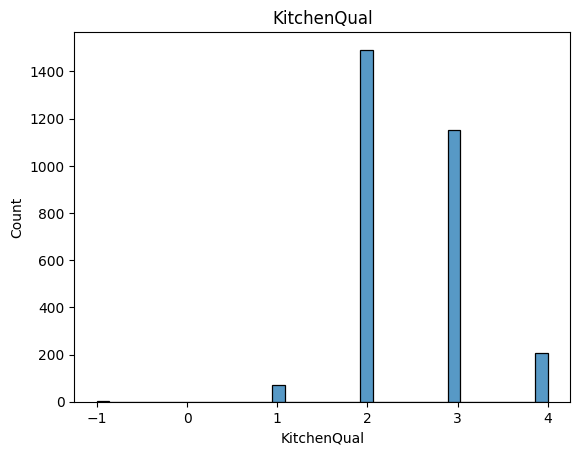

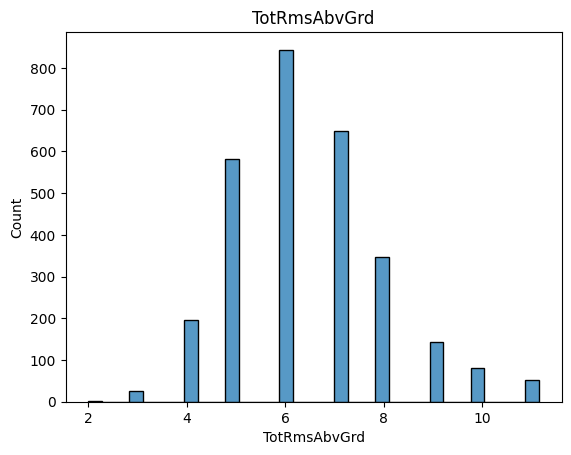

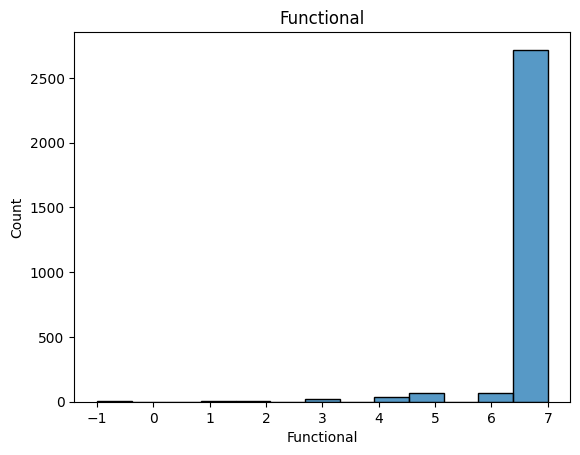

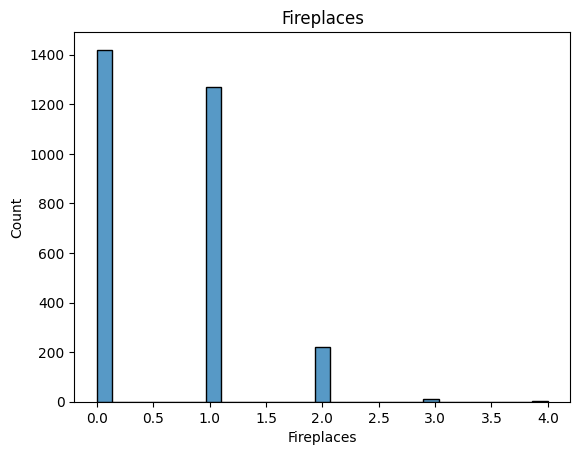

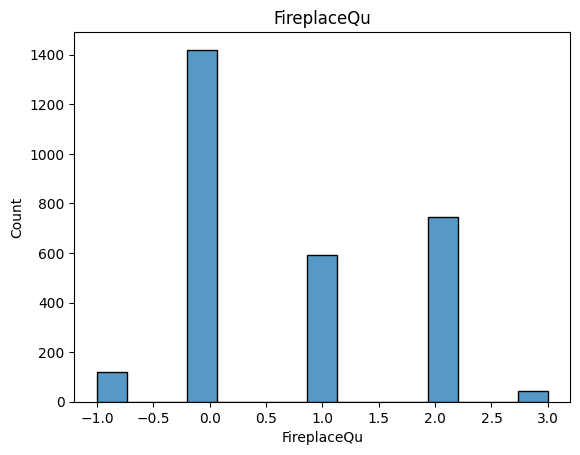

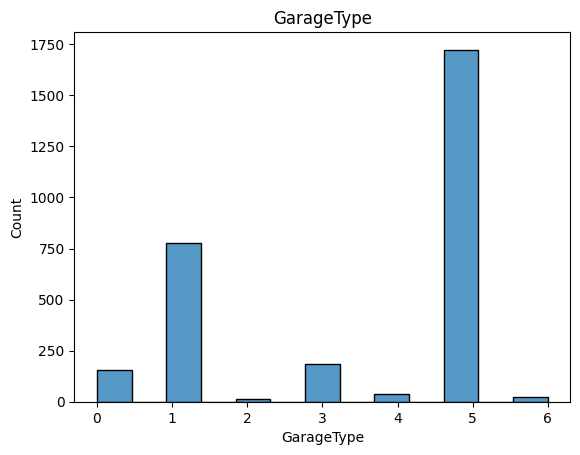

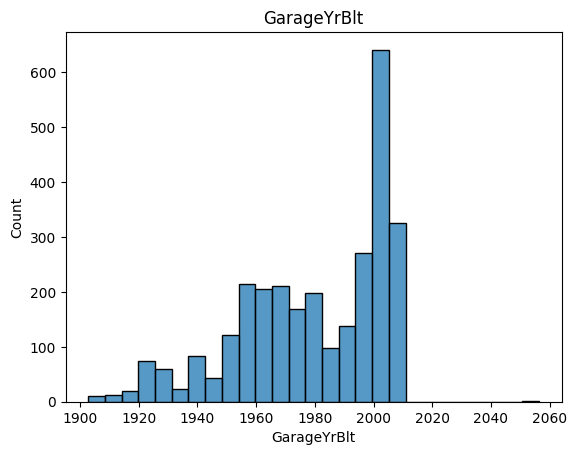

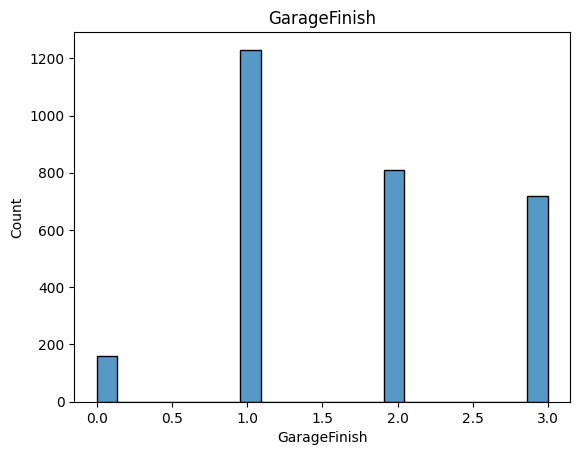

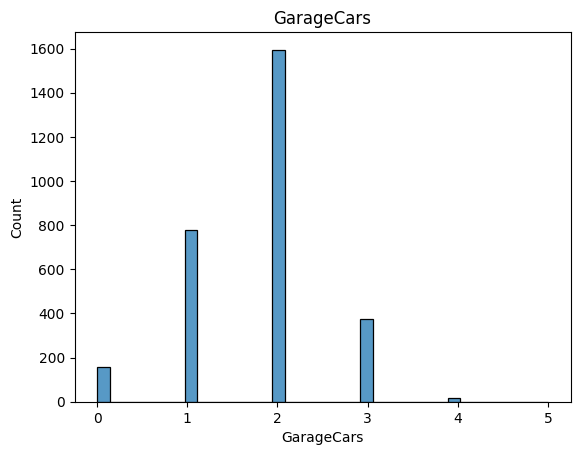

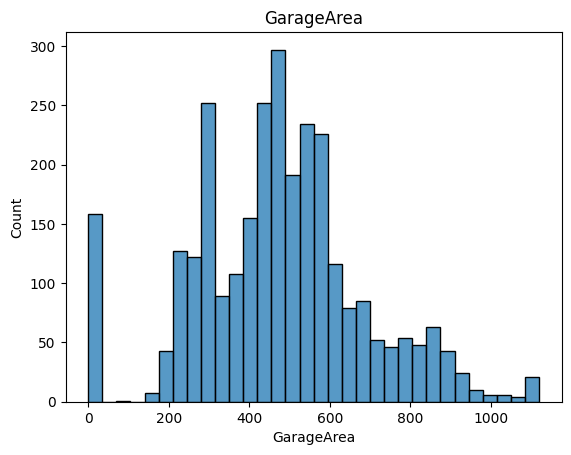

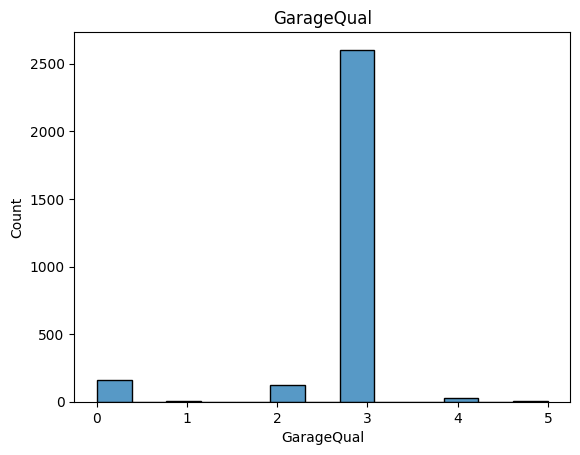

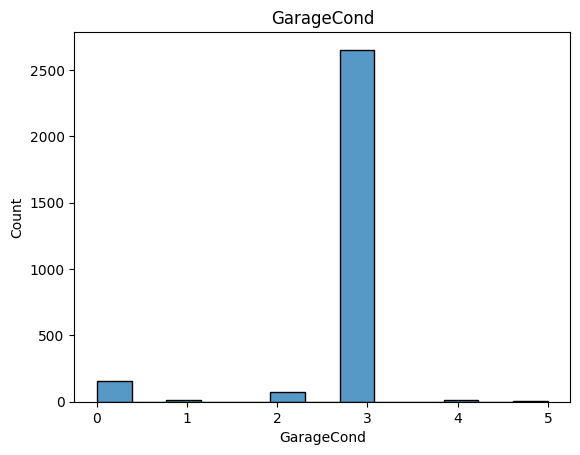

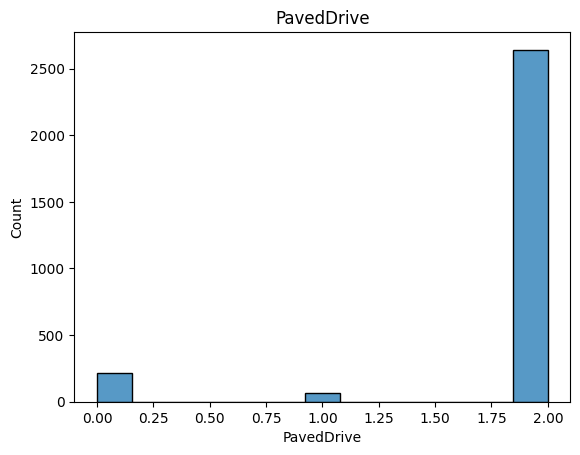

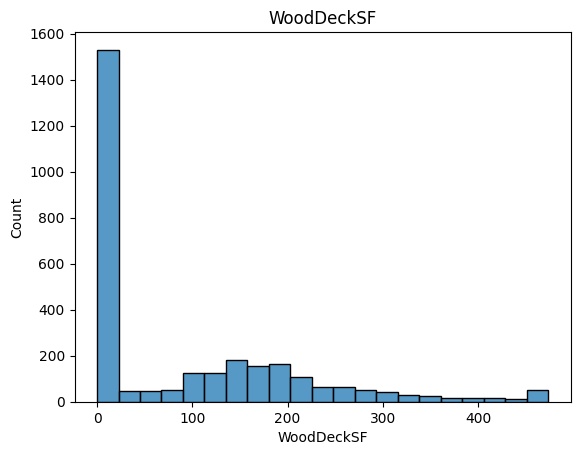

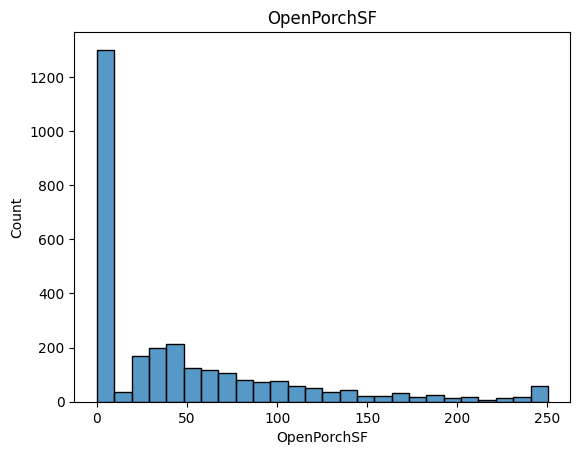

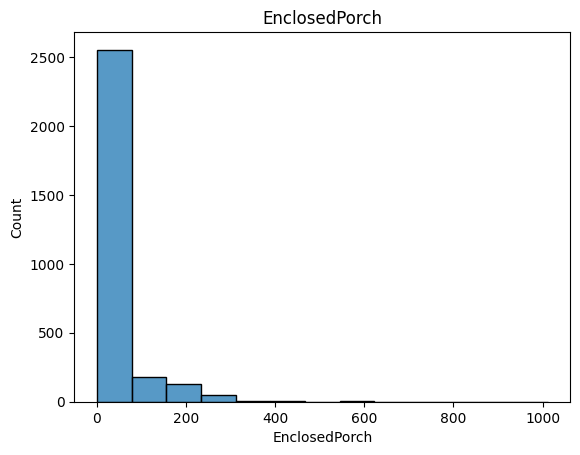

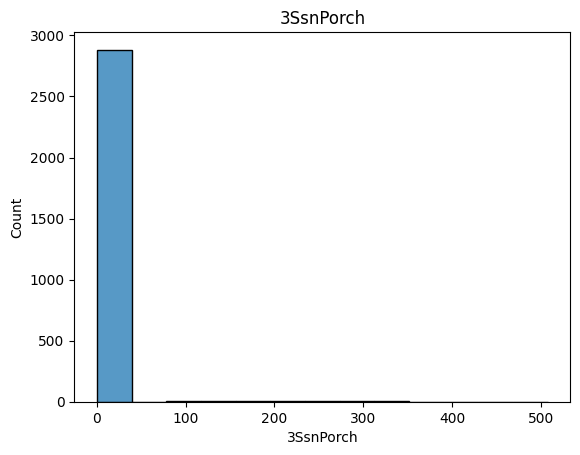

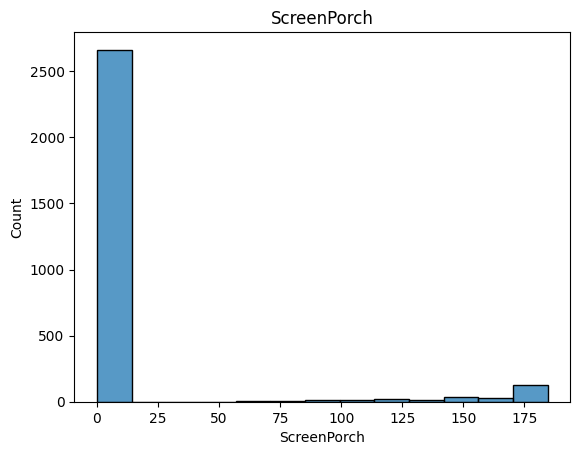

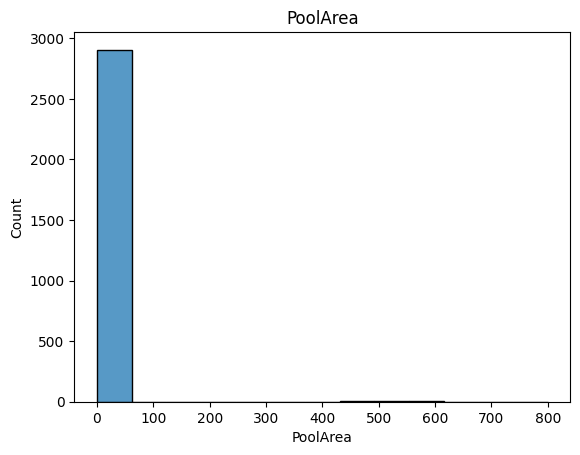

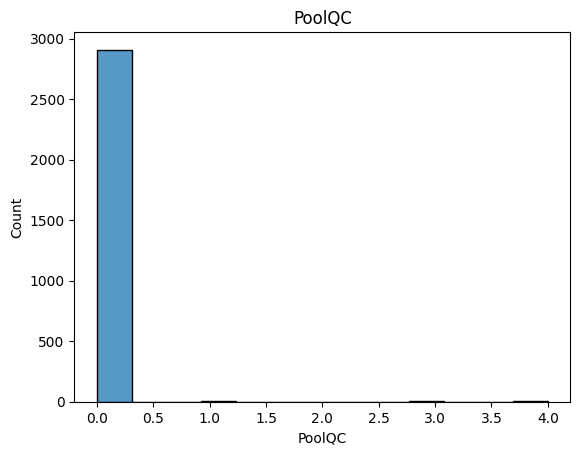

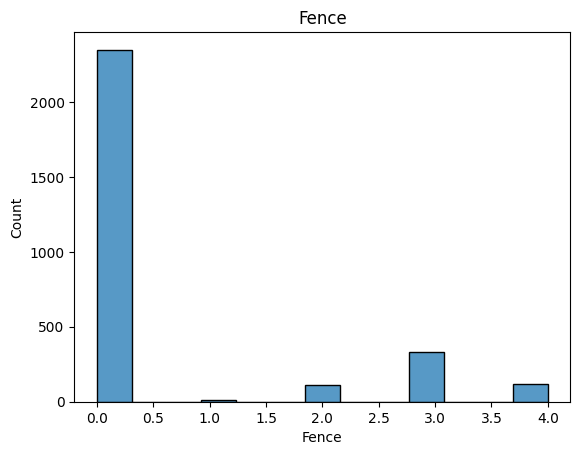

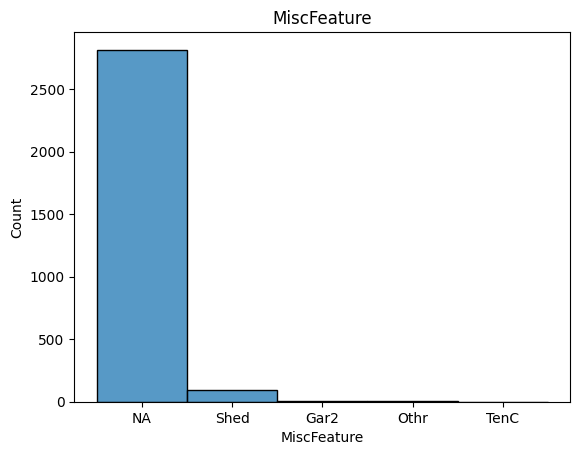

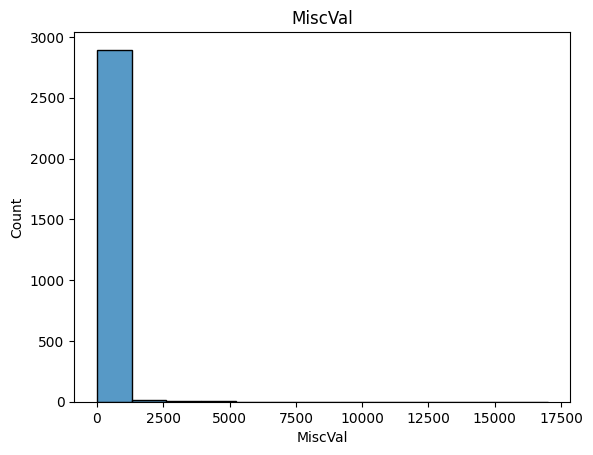

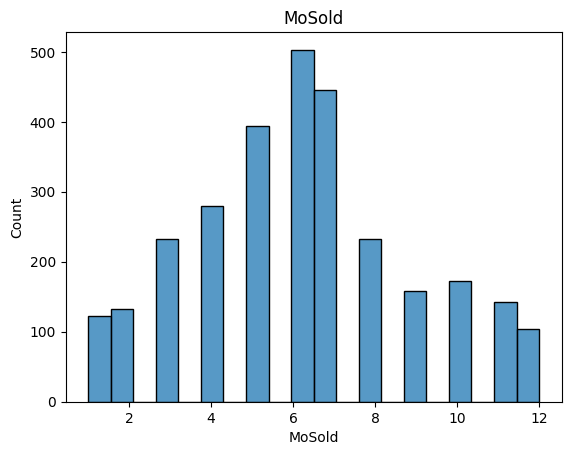

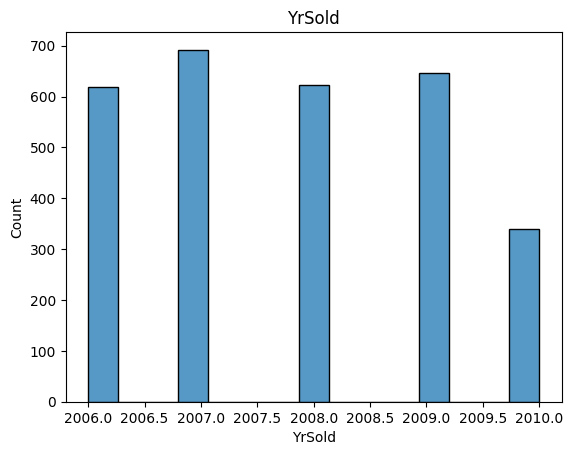

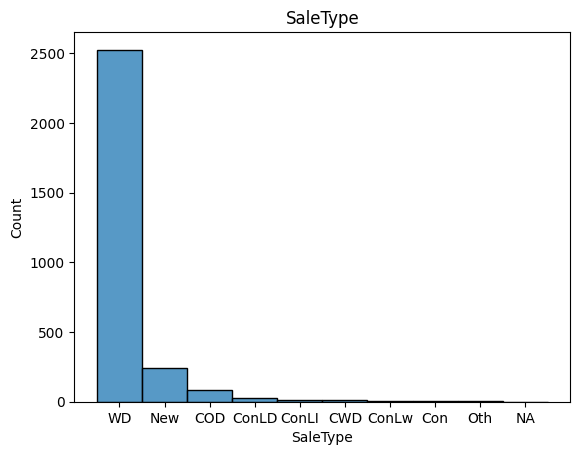

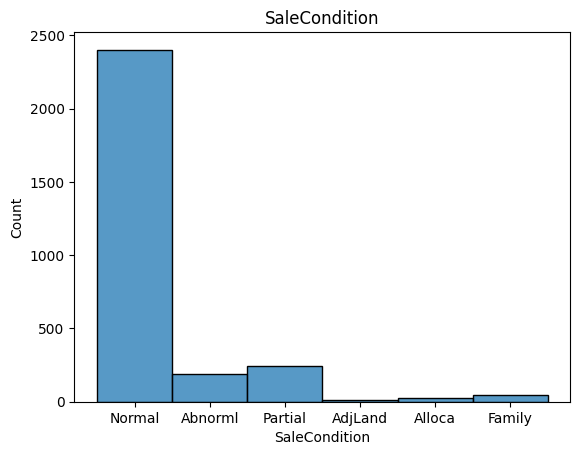

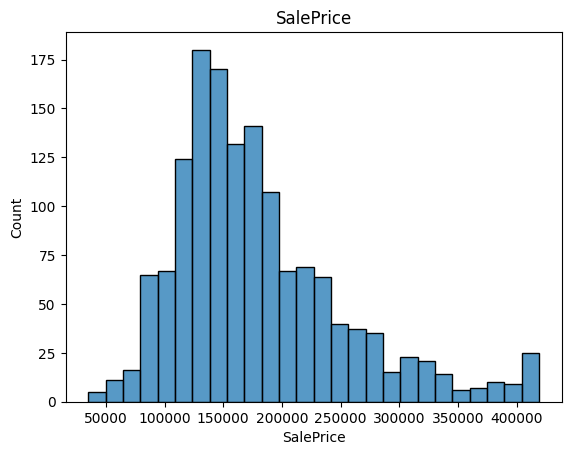

In [19]:
# To visualize distribution of features
for i in df:
    sns.histplot(df[i])
    plt.title(i)  # Add feature name as title
    plt.show()  # Display the plot
    plt.close()  # Close the plot to avoid overlapping figures

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,1,0,3,3,3,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,4.0,Y,4,856.0,854.0,0,1710.0,1.0,0.0,2.0,1,3,1,3,8.0,7,0,0,5,2003.0,2,2.0,548.0,3,3,2,0.0,61.0,0,0,0.0,0,0,0,NA,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,1,0,3,3,3,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,2,2,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,4.0,Y,4,1262.0,0.0,0,1262.0,0.0,1.0,2.0,0,3,1,2,6.0,7,1,1,5,1976.0,2,2.0,460.0,3,3,2,298.0,0.0,0,0,0.0,0,0,0,NA,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,1,0,2,3,3,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486.0,1,0.0,434.0,920.0,GasA,4.0,Y,4,920.0,866.0,0,1786.0,1.0,0.0,2.0,1,3,1,3,6.0,7,1,1,5,2001.0,2,2.0,608.0,3,3,2,0.0,42.0,0,0,0.0,0,0,0,NA,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,1,0,2,3,3,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,2,2,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,3.0,Y,4,961.0,756.0,0,1717.0,1.0,0.0,1.0,0,3,1,3,7.0,7,1,2,1,1998.0,1,3.0,642.0,3,3,2,0.0,35.0,272,0,0.0,0,0,0,NA,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,1,0,2,3,3,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655.0,1,0.0,490.0,1145.0,GasA,4.0,Y,4,1145.0,1053.0,0,2198.0,1.0,0.0,2.0,1,4,1,3,9.0,7,1,1,5,2000.0,2,3.0,836.0,3,3,2,192.0,84.0,0,0,0.0,0,0,0,NA,0,12,2008,WD,Normal,250000.0


In [21]:
# Let's see if there is any feature whose type is object.
object_features = [i for i in df.columns if df[i].dtype == 'O']
object_features

['MSZoning',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### There are some features which are object. Machine learning models can not process object type features. To convert
#### them, we will use label encoder here.

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
for i in object_features:
    df[i] = encoder.fit_transform(df[i])

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450.0,1,0,3,3,3,4,2,5,2,2,0,5,7,5,2003,2003,1,1,13,14,1,196.0,3,2,2,4,3,1,6,706.0,1,0.0,150.0,856.0,1,4.0,1,4,856.0,854.0,0,1710.0,1.0,0.0,2.0,1,3,1,3,8.0,7,0,0,5,2003.0,2,2.0,548.0,3,3,2,0.0,61.0,0,0,0.0,0,0,0,1,0,2,2008,9,4,208500.0
1,2,20,4,80.0,9600.0,1,0,3,3,3,2,2,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,2,2,1,4,3,4,5,978.0,1,0.0,284.0,1262.0,1,4.0,1,4,1262.0,0.0,0,1262.0,0.0,1.0,2.0,0,3,1,2,6.0,7,1,1,5,1976.0,2,2.0,460.0,3,3,2,298.0,0.0,0,0,0.0,0,0,0,1,0,5,2007,9,4,181500.0
2,3,60,4,68.0,11250.0,1,0,2,3,3,4,2,5,2,2,0,5,7,5,2001,2002,1,1,13,14,1,162.0,3,2,2,4,3,2,6,486.0,1,0.0,434.0,920.0,1,4.0,1,4,920.0,866.0,0,1786.0,1.0,0.0,2.0,1,3,1,3,6.0,7,1,1,5,2001.0,2,2.0,608.0,3,3,2,0.0,42.0,0,0,0.0,0,0,0,1,0,9,2008,9,4,223500.0
3,4,70,4,60.0,9550.0,1,0,2,3,3,0,2,6,2,2,0,5,7,5,1915,1970,1,1,14,16,2,0.0,2,2,0,3,4,1,5,216.0,1,0.0,540.0,756.0,1,3.0,1,4,961.0,756.0,0,1717.0,1.0,0.0,1.0,0,3,1,3,7.0,7,1,2,1,1998.0,1,3.0,642.0,3,3,2,0.0,35.0,272,0,0.0,0,0,0,1,0,2,2006,9,0,140000.0
4,5,60,4,84.0,14260.0,1,0,2,3,3,2,2,15,2,2,0,5,8,5,2000,2000,1,1,13,14,1,350.0,3,2,2,4,3,3,6,655.0,1,0.0,490.0,1145.0,1,4.0,1,4,1145.0,1053.0,0,2198.0,1.0,0.0,2.0,1,4,1,3,9.0,7,1,1,5,2000.0,2,3.0,836.0,3,3,2,192.0,84.0,0,0,0.0,0,0,0,1,0,12,2008,9,4,250000.0


### Scaling for Machine Learning Models
#### Machine learning models often perform better when features (independent variables) are on a similar scale. This is because many 
#### algorithms rely on the distances or magnitudes between data points to learn patterns and make predictions. When features have vastly 
#### different scales, those with larger values can dominate the model's learning process, potentially leading to inaccurate predictions and 
#### biased results. So, we'll use min-max scaler here. You can also use Standardization here. It's all depend on data nature.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaling_features = [i for i in df.columns if i not in ['SalePrice']]
scaling_features

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [27]:
scaler = MinMaxScaler()
scaler.fit(df[scaling_features])
scaled_data = scaler.transform(df[scaling_features])

In [28]:
# Check that the shapes are consistent

print('df_final shape:', df.shape)
print('df_train shape:', data_train.shape)
print('df_test shape:',  data_test.shape)

X_Train = pd.DataFrame(df[:1460])
X_Test  = pd.DataFrame(df[1460:])
Y_Train = data_train['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_Train.shape)
print('Y_train shape:', Y_Train.shape)
print('X_test shape:',  X_Test.shape)

df_final shape: (2919, 81)
df_train shape: (1460, 81)
df_test shape: (1459, 80)

Check that the datasets are consistent:

X_train shape (1460, 81)
Y_train shape: (1460,)
X_test shape: (1459, 81)


### Splitting the Dataset for Machine Learning Models
#### Splitting a dataset is a crucial step in the machine learning workflow. It involves dividing the data into different subsets for 
#### various purposes: training, evaluating, and potentially testing the model. This helps ensure the model doesn't simply memorize the 
#### training data and can generalize well to unseen data.

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_Train, train_size=0.8, test_size=0.2,random_state=0)

### Using Split Data to Train and Evaluate Machine Learning Models
#### After splitting your dataset into training, validation (optional), and test sets, you can leverage these subsets to train and evaluate 
#### your machine learning model. Here's a breakdown of how this process unfolds:
### Training the Model:
#### 1. The training set, which is the largest portion of your data, is fed into the chosen machine learning model.
#### 2. The model analyzes the patterns and relationships within the training data. This involves adjusting internal parameters (weights and 
#### biases) to learn a mapping function between the features (independent variables) and the target variable (what you're trying to 
#### predict).
#### 3. Training algorithms often involve optimization techniques that minimize the error between the model's predictions and the actual 
#### values in the training data.
### Model Evaluation:
#### 1. Once trained (and potentially hyperparameter-tuned), the model's performance is evaluated on the held-out test set.
#### 2. The test set represents unseen data that the model hasn't encountered during training. This allows you to assess the model's ability 
#### to generalize and make accurate predictions on new data.
#### 3. Common evaluation metrics depend on the type of machine learning task (regression or classification). For regression tasks, you 
#### might use metrics like mean squared error (MSE) or R-squared. For classification tasks, accuracy, precision, recall, and F1-score are 
#### common choices.


### Note: 
#### There are so many different models. Every models have its own strength and weakness. So, we'll use certain models here.
#### Here we'll use:
#### 1. Linear Regression
#### 2. Random Forest Tree Regressor
#### 3. XGBoost Regressor

### 1. Linear Regression

In [30]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [31]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [32]:
y_pred = linear_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_pred, Y_test)

6309.490113418247

### 2. Random Forest Tree Regressor

In [34]:
# Import RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Set estimators here. You can use any number of estimator here. Try it with different estimators!
forest_regressor_model = RandomForestRegressor(n_estimators=10)  # Adjust hyperparameters as needed

In [36]:
forest_regressor_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10)

In [37]:
forest_predictions = forest_regressor_model.predict(X_test)

In [38]:
mae(forest_predictions, Y_test)

1719.913013698631

### 3. XGBoost Regressor 

### Warning!
#### Sometime, you have to install xgboost in your system for access. To install, write !pip install xgboost

In [39]:
from xgboost import XGBRegressor

In [40]:
XGBoost_model = XGBRegressor()

#### While XGBoost Regressor is a powerful tool, it requires careful configuration of its hyperparameters to achieve optimal performance. 
#### Two crucial hyperparameters for XGBoost are:
#### 1. Learning Rate (eta): This parameter controls the step size the model takes when updating its internal weights during the boosting 
#### process.
#### i). Smaller Learning Rates: Lead to more conservative updates, potentially requiring more trees (higher n_estimators) to achieve good 
#### accuracy but reducing the risk of overfitting.
#### ii). Larger Learning Rates: Can lead to faster convergence (fewer trees needed) but also increase the risk of overfitting if not set 
#### appropriately.
#### 2. n_estimators (number of trees): This parameter determines the number of decision trees used to build the ensemble model.
#### i). Lower n_estimators: May result in underfitting, where the model fails to capture the underlying patterns in the data.
#### ii). Higher n_estimators: Generally improves model performance but can lead to overfitting if not balanced with an appropriate learning 
#### rate.

In [41]:
# Set hyperparameters
XGBoost_model.learning_rate = 0.1
XGBoost_model.n_estimators = 60

In [42]:
XGBoost_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
XGBoost_predictions = XGBoost_model.predict(X_test)

In [44]:
mae(XGBoost_predictions, Y_test)

1842.3873876284247

### Now, It's time to check accuracy of different models

In [45]:
from sklearn.metrics import r2_score

#### R-squared (R²), also known as the coefficient of determination, is a statistical metric used in regression analysis to evaluate how 
#### well a linear regression model fits the data. It essentially represents the proportion of variance (squared deviations from the mean) 
#### in the dependent variable that the independent variables explain collectively.
#### Here's a breakdown of R² and its significance in machine learning:
#### Understanding R²:
#### 1). R² is a value between 0 and 1, where:
#### i). 0 indicates the model explains none of the variance in the dependent variable (terrible fit).
#### ii). 1 indicates the model explains perfectly all of the variance in the dependent variable (perfect fit).
#### 2. In practice, R² values closer to 1 are generally desirable, signifying a better fit between the model's predictions and the actual 
#### data.

### R² score of linear model

In [46]:
# R2 score of linear_model.
r2_linear_model = r2_score(Y_test, y_pred)
print(r2_linear_model)

0.9553884698351596


Text(0.5, 1.0, 'Linear Regression Model')

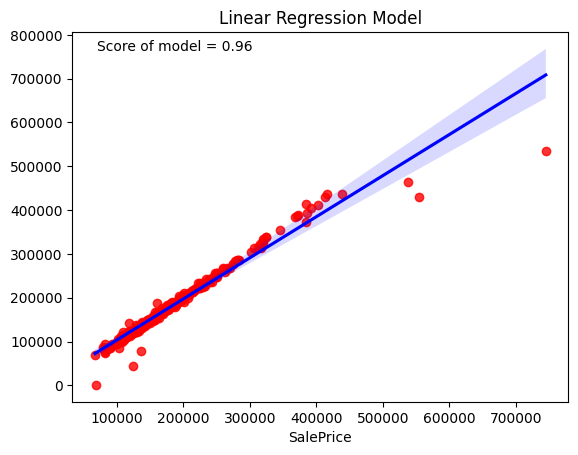

In [47]:
# reg plot of linear model
plt.text(0.05, 0.95, f"Score of model = {r2_linear_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred, color='red', line_kws={'color': 'blue'})
plt.title('Linear Regression Model')

### R² score of random forest model

In [48]:
# R2 score of random_forest_model.
r2_random_model = r2_score(Y_test, forest_predictions)
print(r2_random_model)

0.9862998838614485


Text(0.5, 1.0, 'Random Forest Model')

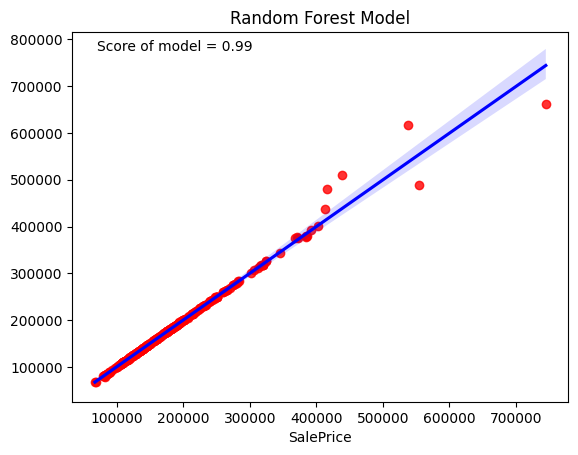

In [49]:
# reg plot for random forest model.
plt.text(0.05, 0.95, f"Score of model = {r2_random_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=forest_predictions, color='red', line_kws={'color': 'blue'})
plt.title('Random Forest Model')

### R² of XGBoost Regressor model

In [50]:
# R2 score of xgboost_model.
r2_xgboost_model = r2_score(Y_test, XGBoost_predictions)
print(r2_xgboost_model)

0.9799997810769137


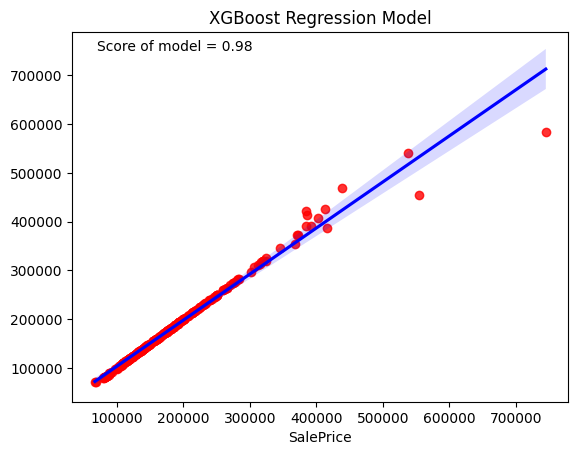

In [51]:
# reg plot for XGBRegressor model.
plt.text(0.05, 0.95, f"Score of model = {r2_xgboost_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=XGBoost_predictions, color='red', line_kws={'color': 'blue'})
plt.title('XGBoost Regression Model')
plt.show()

### Ridge regression and Lasso regression are both linear regression models used for addressing a common challenge in machine learning: 
#### overfitting. Overfitting occurs when a model becomes too focused on the specific training data it's learned from and fails to 
#### generalize well to unseen data.
#### Here's a breakdown of Ridge and Lasso regression, highlighting their key differences and applications:
### 1. Ridge Regression:
#### i). Core Idea: Ridge regression tackles overfitting by adding a penalty term to the linear regression cost function. This penalty term 
#### penalizes the model for having large coefficients (weights associated with features).
#### ii). Impact: By penalizing large coefficients, Ridge regression discourages the model from giving excessive weight to any single 
#### feature. This leads to a simpler and potentially more generalizable model.
#### iii). Regularization Parameter (alpha): The strength of the penalty term is controlled by a hyperparameter called alpha. A higher alpha 
#### value leads to a stronger penalty on large coefficients, resulting in a simpler model.
#### iv). Use Cases: Ridge regression is a good choice when you have a large number of features, especially if some might be correlated. It 
#### can also be useful when you don't necessarily care about feature selection and just want a model with good predictive performance.
### 2. Lasso Regression (LASSO):
#### i). Core Idea: Lasso regression, similar to Ridge regression, uses a penalty term. However, Lasso uses the L1 norm (sum of absolute 
#### values) of the coefficients as the penalty, leading to a different effect.
#### ii). Impact: The L1 penalty in Lasso regression can actually shrink some coefficients to zero. This effectively performs feature 
#### selection, removing features deemed unimportant by the model from the final model.
#### iii). Sparsity: Lasso regression often leads to a more sparse model with fewer non-zero coefficients, potentially improving 
#### interpretability in addition to reducing overfitting.
#### iv). Use Cases: Lasso regression is a good choice when you suspect some features might be irrelevant or redundant, and you want the 
#### model to perform selection along with regularization. It can also be useful for interpreting the model and understanding which features 
#### are most important for prediction.
### Choosing Between Ridge and Lasso:
#### The choice between Ridge and Lasso depends on your specific needs:
#### If feature selection and interpretability are important: Use Lasso.
#### If you have a large number of features and want to avoid overfitting: Consider both Ridge and Lasso, and compare their performance 
#### through techniques like cross-validation.

In [52]:
from sklearn.linear_model import Ridge, Lasso

#### Lasso adds a penalty term to the standard linear regression cost function. This penalty term is based on the L1 norm of the coefficients 
#### weights associated with features), which is simply the sum of their absolute values.
### The Role of Alpha: This hyperparameter, alpha, controls the strength of the L1 penalty in the cost function.
#### 1. Higher Alpha Values: Lead to a stronger penalty on large coefficients. This forces the model to shrink some coefficients towards 
#### zero, potentially even setting them to exactly zero. This promotes feature selection by effectively removing features deemed 
#### unimportant by the model.
#### 2. Lower Alpha Values: Result in a weaker penalty, allowing the model to have larger coefficients. This can lead to a more complex 
#### model that might capture more nuanced relationships in the data but also increases the risk of overfitting.
### Note: You can adjust value of alpha to see results.

In [53]:
lasso_model = Lasso(alpha = 450.0)

In [54]:
lasso_model.fit(X_train, Y_train)

Lasso(alpha=450.0)

In [55]:
lasso_predict = lasso_model.predict(X_test)

In [56]:
mae(lasso_predict, Y_test)

4242.088735888374

#### Ridge regression, a popular technique for regularizing linear regression models, employs a penalty term to discourage the model from 
#### assigning excessively large weights (coefficients) to any single feature. This helps prevent overfitting and can lead to a more 
#### generalizable model.
### The Role of Alpha:
#### Penalty Term: Ridge regression adds a penalty term to the standard linear regression cost function. This penalty term is based on the 
#### L2 norm of the coefficients, which is the sum of their squares.
#### Alpha Controls the Penalty Strength: A hyperparameter called alpha controls the strength of this L2 penalty term.
#### 1. Higher Alpha Values: Lead to a stronger penalty on large coefficients. This encourages the model to have smaller, more evenly 
#### distributed coefficients, resulting in a simpler model with potentially better generalizability.
#### 2. Lower Alpha Values: Result in a weaker penalty, allowing the model to have larger coefficients. This can lead to a more complex 
#### model that might capture more intricate relationships in the data but also increases the risk of overfitting.
### Note: You can adjust value of alpha to see results.

In [57]:
ridge_model = Ridge(alpha=1.0)

In [58]:
ridge_model = Ridge(alpha=1.0)

In [59]:
ridge_model.fit(X_train, Y_train)

Ridge()

In [60]:
ridge_predict = ridge_model.predict(X_test)

In [61]:
# R2 score of Ridge_Regression_model.
r2_ridge_model = r2_score(Y_test, ridge_predict)
print(r2_ridge_model)

0.9564042326236478


In [62]:
# R2 score of Lasso_Regression_model.
r2_lasso_model = r2_score(Y_test, lasso_predict)
print(r2_lasso_model)

0.9630902584628965


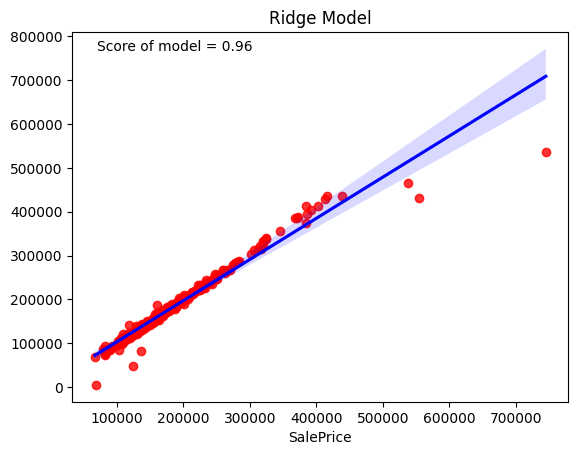

In [63]:
# reg plot for Ridge_regression model.
plt.text(0.05, 0.95, f"Score of model = {r2_ridge_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=ridge_predict, color='red', line_kws={'color': 'blue'})
plt.title('Ridge Model')
plt.show()

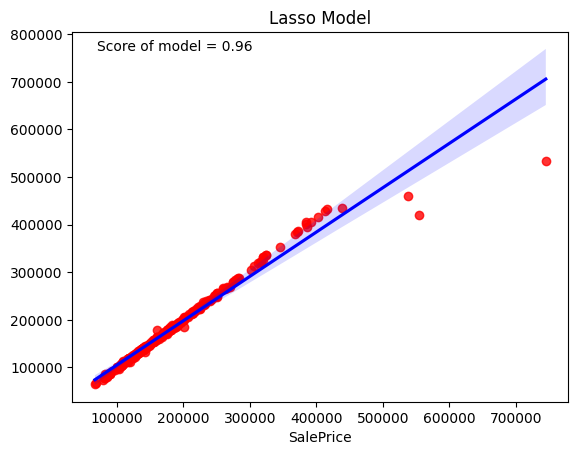

In [64]:
# reg plot for lasso model.
plt.text(0.05, 0.95, f"Score of model = {r2_lasso_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=lasso_predict, color='red', line_kws={'color': 'blue'})
plt.title('Lasso Model')
plt.show()

### Let's check MSE of different models.
#### Note: MSE stands for Mean Squared Error. It's a common metric used in regression analysis to measure the quality of the predictions 
#### made by a regression model. Here's a breakdown of what MSE signifies and how it's interpreted:
#### 1. MSE essentially calculates the average squared difference between the predicted values from your model and the actual values (ground 
#### truth) in your dataset.
#### 2. It reflects how well your model's predictions fit the actual data.
#### 3. Lower MSE values indicate a better fit, meaning the model's predictions are on average closer to the actual values.
#### 4. Conversely, higher MSE values indicate a poorer fit, signifying that the model's predictions deviate more from the actual values.

In [65]:
from sklearn.metrics import mean_squared_error as mse

In [68]:
linear_model_mse = mse(y_pred, Y_test)
forest_model_mse = mse(forest_predictions, Y_test)
XGBoost_model_mse = mse(XGBoost_predictions, Y_test)
print('The mse of linear regression model is :', linear_model_mse)
print('The mse of linear random forest model is :', forest_model_mse)
print('The mse of linear XGBoost model is :', XGBoost_model_mse)

The mse of linear regression model is : 308080533.98300755
The mse of linear random forest model is : 94610946.54226033
The mse of linear XGBoost model is : 138118511.13005903


In [67]:
df['SalePrice'].describe()

count      1460.000000
mean     179512.256507
std       73240.906241
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      419248.704539
Name: SalePrice, dtype: float64

### Now build neural network using tensorflow for predict house prices.

In [78]:
import tensorflow as tf

2024-04-25 12:17:30.761933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [79]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [80]:
model_tf = Sequential([
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='linear')
])

### Neuron accept in numpy array format. Before feed data to neuron, convert them to numpy array first.

In [81]:
X_train_np = np.asarray(X_train)
Y_train_np = np.asarray(Y_train)

In [82]:
model_tf.compile( loss=tf.keras.losses.mean_absolute_error, optimizer=Adam(), metrics=tf.keras.losses.mean_squared_error)

In [83]:
model_tf.fit(X_train_np, Y_train_np, epochs=10)

Epoch 1/10
37/37 [==============================] - 1s 1ms/step - loss: 96730.6016 - mean_squared_error: 12867118080.0000
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 10859.4307 - mean_squared_error: 474282080.0000
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 4172.0063 - mean_squared_error: 251748464.0000
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: 3383.4192 - mean_squared_error: 239405392.0000
Epoch 5/10
37/37 [==============================] - 0s 1ms/step - loss: 2724.8833 - mean_squared_error: 233174080.0000
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 1998.5741 - mean_squared_error: 226773824.0000
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: 1741.0636 - mean_squared_error: 222405824.0000
Epoch 8/10
37/37 [==============================] - 0s 1ms/step - loss: 1595.5226 - mean_squared_error: 222188352.0000
Epoch 9/10
37/37 [==========================

### Note: We can use early stopping here to prevent increase loss.

In [84]:
tf_predictions = model_tf.predict(X_test)
tf_predictions

10/10 [==============================] - 0s 1ms/step


array([[200339.73 ],
       [132795.7  ],
       [109796.48 ],
       [192095.62 ],
       [ 88101.375],
       [ 84800.336],
       [282716.7  ],
       [141008.7  ],
       [418893.16 ],
       [148683.28 ],
       [208793.25 ],
       [136927.81 ],
       [224857.61 ],
       [122989.21 ],
       [119262.06 ],
       [144897.14 ],
       [189819.31 ],
       [123403.04 ],
       [149218.34 ],
       [154817.06 ],
       [165865.94 ],
       [144414.16 ],
       [109826.5  ],
       [173816.33 ],
       [184974.2  ],
       [167982.94 ],
       [177392.86 ],
       [ 84288.98 ],
       [319781.75 ],
       [118390.445],
       [110103.77 ],
       [212721.34 ],
       [155776.28 ],
       [249999.48 ],
       [372252.7  ],
       [174906.1  ],
       [277254.62 ],
       [112351.96 ],
       [262838.78 ],
       [324773.06 ],
       [242456.88 ],
       [129690.305],
       [164806.77 ],
       [279837.22 ],
       [402615.3  ],
       [119003.516],
       [124883.69 ],
       [12801

In [85]:
Y_test.head()

529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64

### Warnings!
#### There are still so many different models that can have better mae or mse than above models or can just hyperparameter tuning to get 
#### best score. So, yeah! I hope this is the best version as you expected!